# Module 03

### Exercise 3a  Saving and loading data
*Relevant sections: 3.1.2, 3.1.3*

Use YAML or JSON to save your maze data structure to disk and load it again.

The maze would have looked something like this:

In [1]:
house = {
    "living": {
        "exits": {"north": "kitchen", "outside": "garden", "upstairs": "bedroom"},
        "people": ["James"],
        "capacity": 2,
    },
    "kitchen": {"exits": {"south": "living"}, "people": [], "capacity": 1},
    "garden": {"exits": {"inside": "living"}, "people": ["Sue"], "capacity": 3},
    "bedroom": {
        "exits": {"downstairs": "living", "jump": "garden"},
        "people": [],
        "capacity": 1,
    },
}

### Exercise 3a Answer

**Save as JSON or YAML**

In [2]:
import json
import yaml

In [3]:
# Write with json.dump
with open("myfile.json", "w") as f:
    json.dump(house, f)

In [4]:
# Look at the file on disk
!cat myfile.json

{"living": {"exits": {"north": "kitchen", "outside": "garden", "upstairs": "bedroom"}, "people": ["James"], "capacity": 2}, "kitchen": {"exits": {"south": "living"}, "people": [], "capacity": 1}, "garden": {"exits": {"inside": "living"}, "people": ["Sue"], "capacity": 3}, "bedroom": {"exits": {"downstairs": "living", "jump": "garden"}, "people": [], "capacity": 1}}

In [5]:
# Or with file.write, using json.dumps to convert to a string
with open("myotherfile.json", "w") as json_maze_out:
    json_maze_out.write(json.dumps(house))

In [6]:
# Look at the file on disk
!cat myotherfile.json

{"living": {"exits": {"north": "kitchen", "outside": "garden", "upstairs": "bedroom"}, "people": ["James"], "capacity": 2}, "kitchen": {"exits": {"south": "living"}, "people": [], "capacity": 1}, "garden": {"exits": {"inside": "living"}, "people": ["Sue"], "capacity": 3}, "bedroom": {"exits": {"downstairs": "living", "jump": "garden"}, "people": [], "capacity": 1}}

In [7]:
# Write with yaml.safe_dump
with open("myfile.yml", "w") as f:
    yaml.safe_dump(house, f, default_flow_style=False)

In [8]:
# Look at the file on disk
!cat myfile.yml

bedroom:
  capacity: 1
  exits:
    downstairs: living
    jump: garden
  people: []
garden:
  capacity: 3
  exits:
    inside: living
  people:
  - Sue
kitchen:
  capacity: 1
  exits:
    south: living
  people: []
living:
  capacity: 2
  exits:
    north: kitchen
    outside: garden
    upstairs: bedroom
  people:
  - James


In [9]:
# Or with file.write, using yaml.dump to convert to a string
with open("myotherfile.yaml", "w") as yaml_maze_out:
    yaml_maze_out.write(yaml.dump(house, default_flow_style=True))

In [10]:
# Look at the file on disk
!cat myotherfile.yaml

{bedroom: {capacity: 1, exits: {downstairs: living, jump: garden}, people: []}, garden: {
    capacity: 3, exits: {inside: living}, people: [Sue]}, kitchen: {capacity: 1, exits: {
      south: living}, people: []}, living: {capacity: 2, exits: {north: kitchen, outside: garden,
      upstairs: bedroom}, people: [James]}}


**Loading with JSON or YAML**

In [11]:
# Read into a string then load with json.loads
with open("myfile.json", "r") as f:
    mydataasstring = f.read()
my_json_data = json.loads(mydataasstring)
print(my_json_data["living"])

{'exits': {'north': 'kitchen', 'outside': 'garden', 'upstairs': 'bedroom'}, 'people': ['James'], 'capacity': 2}


In [12]:
# Read directly with json.load
with open("myotherfile.json") as f_json_maze:
    maze_again = json.load(f_json_maze)
print(maze_again["living"])

{'exits': {'north': 'kitchen', 'outside': 'garden', 'upstairs': 'bedroom'}, 'people': ['James'], 'capacity': 2}


In [13]:
# Read into a string then load with yaml.safe_load
with open("myfile.yaml", "r") as f:
    mydataasstring = f.read()
my_yaml_data = yaml.safe_load(mydataasstring)
print(my_yaml_data["living"])

{'exits': {'north': 'kitchen', 'outside': 'garden', 'upstairs': 'bedroom'}, 'people': ['James'], 'capacity': 2}


In [14]:
# Read directly with yaml.safe_load
with open("myotherfile.yaml") as f_yaml_maze:
    maze_again = yaml.safe_load(f_yaml_maze)
print(maze_again["living"])

{'capacity': 2, 'exits': {'north': 'kitchen', 'outside': 'garden', 'upstairs': 'bedroom'}, 'people': ['James']}


### Exercise 3b Plotting with matplotlib

Generate two plots, next to each other (on the same row).

The first plot should show sin(x) and cos(x) for the range of x between -1 pi and +1 pi. 

The second plot should show sin(x), cos(x) and the sum of sin(x) and cos(x) over the same -pi to +pi range. Set suitable limits on the axes and pick colours, markers, or line-styles that will make it easy to differentiate between the curves. Add legends to both axes.

### Exercise 3b Answer

(-1.5, 1.5)

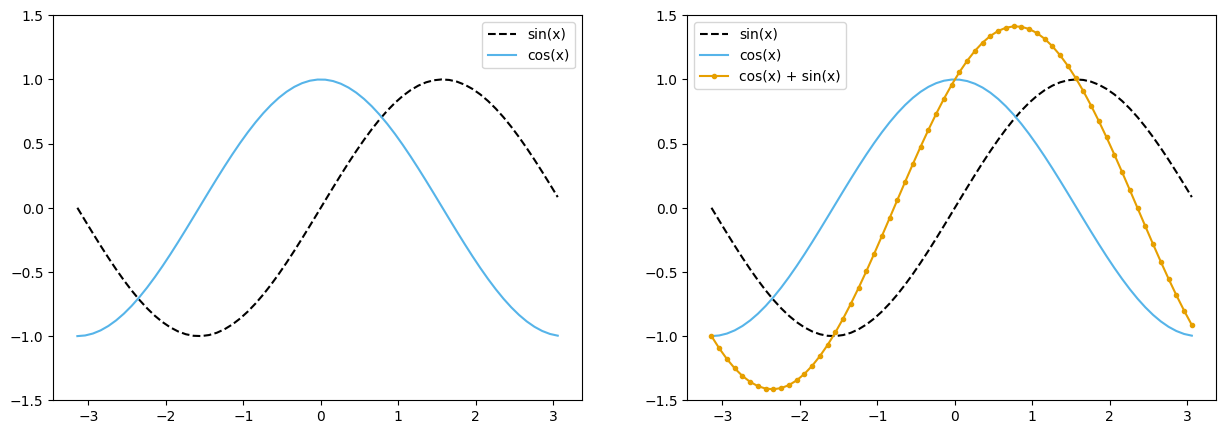

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to get the range of x values (math should work too)
x = np.arange(-np.pi, np.pi, 0.1)

# Define figure dimensions
fig = plt.figure(figsize=(15,5))


ax1 = fig.add_subplot(1,2,1)
ax1.plot(x, np.sin(x),label="sin(x)",color='black', linestyle='dashed')
ax1.plot(x, np.cos(x),label="cos(x)", color='#56B4E9')
ax1.legend()
ax1.set_ylim(-1.5, 1.5)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x, np.sin(x),label="sin(x)",color='black', linestyle='dashed')
ax2.plot(x, np.cos(x),label="cos(x)", color='#56B4E9')
ax2.plot(x, np.cos(x)+np.sin(x), label='cos(x) + sin(x)', color='#E69F00', marker=".")
ax2.legend()
ax2.set_ylim(-1.5, 1.5)


### Exercise 3c The biggest earthquake in the UK this century

### The Problem
`GeoJSON` is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [16]:
import requests

quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2021-01-19",
        "orderby": "time-asc",
    },
)

In [17]:
quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1667826597000,"url":"https://earthquake.usgs.gov'

### Exercise 3c Answer
*Relevant sections: 3.1, 2.5.2, 2.5.1*

### Load the data
* Get the text of the web result
* Parse the data as JSON

In [18]:
import requests
quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2022-11-02", # Change the date to yesterday
        "orderby": "time-asc",
    },
)

In [19]:
import json
# Can get the data indirectly via the text and then load json text....
my_quake_data = json.loads(quakes.text) # Section 3.1 - structured data

# Requests also has a built in json parser (note this gives exactly the same result as 'my_quake_data')
requests_json = quakes.json()

### Investigate the data
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?

There is no foolproof way of doing this. A good first step is to see the type of our data!

In [20]:
type(requests_json)

dict

Now we can navigate through this dictionary to see how the information is stored in the nested dictionaries and lists. The `keys` method can indicate what kind of information each dictionary holds, and the `len` function tells us how many entries are contained in a list. How you explore is up to you!

In [21]:
requests_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [22]:
type(requests_json["features"])

list

In [23]:
len(requests_json["features"])

131

In [24]:
requests_json["features"][0]

{'type': 'Feature',
 'properties': {'mag': 2.6,
  'place': '12 km NNW of Penrith, United Kingdom',
  'time': 956553055700,
  'updated': 1415322596133,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 104,
  'net': 'us',
  'code': 'p0009rst',
  'ids': ',usp0009rst,',
  'sources': ',us,',
  'types': ',impact-text,origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': None,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
 'id': 'usp0009rst'}

In [25]:
requests_json["features"][0].keys()

dict_keys(['type', 'properties', 'geometry', 'id'])

It looks like the coordinates are in the `geometry` section and the magnitude is in the `properties` section.

In [26]:
requests_json["features"][0]["geometry"]

{'type': 'Point', 'coordinates': [-2.81, 54.77, 14]}

In [27]:
requests_json["features"][0]["properties"].keys()

dict_keys(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type', 'title'])

In [28]:
requests_json["features"][0]["properties"]["mag"]

2.6

### Search through the data
* Program a search through all the quakes to find the biggest quake
* Find the place of the biggest quake

In [29]:
quakes = requests_json["features"]

In [30]:
largest_so_far = quakes[0]
for quake in quakes:
    if quake["properties"]["mag"] > largest_so_far["properties"]["mag"]:
        largest_so_far = quake
largest_so_far["properties"]["mag"]

4.8

In [31]:
lon = largest_so_far["geometry"]["coordinates"][0]
lat = largest_so_far["geometry"]["coordinates"][1]

print(f"Latitude: {lat} Longitude: {lon}")

Latitude: 52.52 Longitude: -2.15


### Visualise your answer
* Form a URL for an online map service at that latitude and longitude: look back at the introductory example
* Display that image

In [32]:
import IPython
import requests

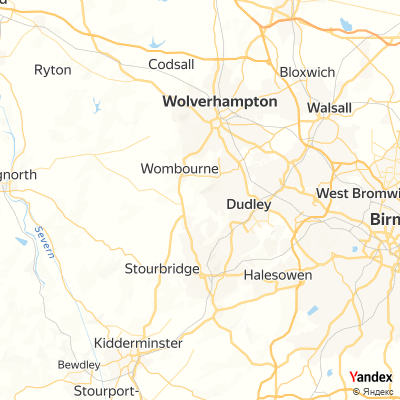

In [33]:
# This is a solution to one of the questions in module 2
# The only difference here is that the map type is set to map rather than satellite view and the zoom is 10 not 12
def op_response(lat, lon):
    response = requests.get(
    "https://static-maps.yandex.ru:443/1.x",
        params={
            "size": "400,400",  # size of map
            "ll": str(lon) + "," + str(lat),  # longitude & latitude of centre
            "z": 10,  # zoom level
            "l": "map",  # map layer (map image)
            "lang": "en_US",  # language
            },
        )
    return response.content

    
op = op_response(lat, lon)

IPython.core.display.Image(op)

## [Optional] Equivalent solution using pandas

In this instance Pandas probably isn't the first thing that you would use as we have nested dictionaries and JSON works very well in such cases.
If we really want to use Pandas we'll need to flatten the nested values before constructing a DataFrame.

In [34]:
features = requests_json["features"]
features[0]

{'type': 'Feature',
 'properties': {'mag': 2.6,
  'place': '12 km NNW of Penrith, United Kingdom',
  'time': 956553055700,
  'updated': 1415322596133,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 104,
  'net': 'us',
  'code': 'p0009rst',
  'ids': ',usp0009rst,',
  'sources': ',us,',
  'types': ',impact-text,origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': None,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
 'id': 'usp0009rst'}

In [35]:
# We can use ** to convert a dictionary into pairs of (key, value)
# We can then run `{(k1, v1), (k2, v2)}` to convert a list of keys and values back into a dictionary
combined_features = [{**f["geometry"], **f["properties"]} for f in features]
combined_features[0]

{'type': 'earthquake',
 'coordinates': [-2.81, 54.77, 14],
 'mag': 2.6,
 'place': '12 km NNW of Penrith, United Kingdom',
 'time': 956553055700,
 'updated': 1415322596133,
 'tz': None,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
 'felt': None,
 'cdi': None,
 'mmi': None,
 'alert': None,
 'status': 'reviewed',
 'tsunami': 0,
 'sig': 104,
 'net': 'us',
 'code': 'p0009rst',
 'ids': ',usp0009rst,',
 'sources': ',us,',
 'types': ',impact-text,origin,phase-data,',
 'nst': None,
 'dmin': None,
 'rms': None,
 'gap': None,
 'magType': 'ml',
 'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'}

In [36]:
import pandas as pd

df = pd.DataFrame.from_records(combined_features)
df.head()

,type,coordinates,mag,place,time,updated,tz,url,detail,felt,...,code,ids,sources,types,nst,dmin,rms,gap,magType,title
0,earthquake,"[-2.81, 54.77, 14]",2.6,"12 km NNW of Penrith, United Kingdom",956553055700,1415322596133,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,p0009rst,",usp0009rst,",",us,",",impact-text,origin,phase-data,",NaN,NaN,NaN,NaN,ml,"M 2.6 - 12 km NNW of Penrith, United Kingdom"
1,earthquake,"[-1.61, 52.28, 13.1]",4.0,"1 km WSW of Warwick, United Kingdom",969683025790,1415322666913,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,p000a0pm,",usp000a0pm,",",us,",",impact-text,origin,phase-data,",55.0,NaN,NaN,NaN,ml,"M 4.0 - 1 km WSW of Warwick, United Kingdom"
2,earthquake,"[1.564, 53.236, 10]",4.0,"38 km NNE of Cromer, United Kingdom",977442788510,1415322705662,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,p000a6hd,",usp000a6hd,",",us,",",origin,phase-data,",27.0,NaN,1.12,NaN,ml,"M 4.0 - 38 km NNE of Cromer, United Kingdom"
3,earthquake,"[0.872, 58.097, 10]",3.3,"171 km ENE of Peterhead, United Kingdom",984608438660,1415322741153,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,p000abdr,",usp000abdr,",",us,",",origin,phase-data,",36.0,NaN,1.44,NaN,mb,"M 3.3 - 171 km ENE of Peterhead, United Kingdom"
4,earthquake,"[-1.845, 51.432, 10]",2.9,"8 km W of Marlborough, United Kingdom",984879824720,1415322742102,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,p000abnc,",usp000abnc,",",us,",",origin,phase-data,",19.0,NaN,0.57,NaN,ml,"M 2.9 - 8 km W of Marlborough, United Kingdom"


In [37]:
df.sort_values("mag", ascending=False, inplace=True)
df.head()

,type,coordinates,mag,place,time,updated,tz,url,detail,felt,...,code,ids,sources,types,nst,dmin,rms,gap,magType,title
19,earthquake,"[-2.15, 52.52, 9.4]",4.8,"2 km ESE of Wombourn, United Kingdom",1032738794600,1600455819229,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,p000bcxg,",usp000bcxg,atlas20020922235314,",",us,atlas,",",impact-text,origin,phase-data,shakemap,trump-...",268.0,NaN,NaN,NaN,mb,"M 4.8 - 2 km ESE of Wombourn, United Kingdom"
81,earthquake,"[-0.332, 53.403, 18.4]",4.8,"1 km NNE of Market Rasen, United Kingdom",1204073807800,1657747150218,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,13654.0,...,p000g02w,",us2008nyae,usp000g02w,atlas20080227005647,",",us,us,atlas,",",associate,dyfi,impact-text,origin,phase-data,...",361.0,NaN,NaN,19.2,mb,"M 4.8 - 1 km NNE of Market Rasen, United Kingdom"
72,earthquake,"[1.009, 51.085, 10]",4.6,"1 km WNW of Lympne, United Kingdom",1177744691360,1657780288041,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,201.0,...,p000fase,",us2007bsal,usp000fase,atlas20070428071811,",",us,us,atlas,",",associate,dyfi,impact-text,origin,phase-data,...",295.0,NaN,1.12,31.8,mb,"M 4.6 - 1 km WNW of Lympne, United Kingdom"
23,earthquake,"[-2.219, 53.478, 5]",4.3,"1 km ESE of Manchester, United Kingdom",1035200554900,1415323007416,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,p000beyx,",usp000beyx,",",us,",",impact-text,origin,phase-data,",46.0,NaN,NaN,NaN,ml,"M 4.3 - 1 km ESE of Manchester, United Kingdom"
113,earthquake,"[-3.8559, 51.7231, 11.55]",4.3,"5 km NE of Clydach, United Kingdom",1518877865070,1664101506468,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,3409.0,...,2000d3uw,",us2000d3uw,",",us,",",dyfi,impact-text,origin,phase-data,shakemap,",NaN,2.167,1.14,92.0,mb,"M 4.3 - 5 km NE of Clydach, United Kingdom"


You can see that we haven't really gained much over the JSON solution.
We still needed to look at the data to see its structure and we had to manually flatten the structure.